<a href="https://colab.research.google.com/github/jasmine400/nlp-/blob/main/k_means_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline
from mpl_toolkits import mplot3d
import random
import plotly.express as px



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/clustering
!ls

/content/gdrive/My Drive/Colab Notebooks/clustering
'CC GENERAL.csv'      dbscan.ipynb     k-means_clustering.ipynb
 clustering_2.ipynb   FLOWERDATA.txt   scatterolpt.ipynb
 dbscan_2.ipynb       k-means_3


In [ ]:
  f = open('FLOWERDATA.txt', 'r');
  lines = f.read().splitlines();
  f.close();

  items = [];
  for i in range(1, len(lines)):
      line = lines[i].split(',');
      itemFeatures = [];
      for j in range(len(line)-1):
        v = float(line[j]);
        itemFeatures.append(v);
      items.append(itemFeatures);
print(items)
print(type(items))
for i in items:
    del i[3]

print(items)

[[4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0, 1.4, 0.3], [5.1, 3.8

In [ ]:
X=[]
Y=[]
Z=[]
for i in items:
  X.append(i[0])
for i in items:
  Y.append(i[1])
for i in items:
  Z.append(i[2])

print(X)

[4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


In [ ]:
a=(random.choice(items))
b=(random.choice(items))
c=(random.choice(items))
print(a,b,c)
x_centroid1=a[0]
y_centroid1=a[1]
z_centroid1=a[2]

x_centroid2=b[0]
y_centroid2=b[1]
z_centroid2=b[2]

x_centroid3=c[0]
y_centroid3=c[1]
z_centroid3=c[2]



[6.0, 2.2, 4.0] [5.0, 3.4, 1.5] [5.7, 2.9, 4.2]


In [ ]:
dif_1=1.5
dif_2=1.5
dif_3=1.5

In [ ]:
while (dif_1>0.05 or dif_2>0.05 or dif_3>0.05):
  if dif_1>0.05:
    distances_c1=[]
    for i in items:
      root_diff_x=(i[0]-x_centroid1)**2
      root_diff_y=(i[1]-y_centroid1)**2
      root_diff_z=(i[2]-z_centroid1)**2
      distance = np.sqrt(root_diff_x + root_diff_y+root_diff_z)
      distances_c1.append(distance)
    #print(distances_c1)
  if dif_2>0.05:

    distances_c2=[]
    for i in items:
      root_diff_x=(i[0]-x_centroid2)**2
      root_diff_y=(i[1]-y_centroid2)**2
      root_diff_z=(i[2]-z_centroid2)**2
      distance = np.sqrt(root_diff_x + root_diff_y+root_diff_z)
      distances_c2.append(distance)
    #print(distances_c2)
  if dif_3>0.05:

    distances_c3=[]
    for i in items:
      root_diff_x=(i[0]-x_centroid3)**2
      root_diff_y=(i[1]-y_centroid3)**2
      root_diff_z=(i[2]-z_centroid3)**2
      distance = np.sqrt(root_diff_x + root_diff_y+root_diff_z)
      distances_c3.append(distance)
    #print(distances_c3)
  data=pd.DataFrame()
  data['X_value']=X
  data['Y_value']=Y
  data['Z_value']=Z
  data['C1_Distance']=distances_c1
  data['C2_Distance']=distances_c2
  data['C3_Distance']=distances_c3
  #print(data.head())
  data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)
  #data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})
  print(data.head(10))
  x_new_centroid1 = data[data['Cluster']==0]['X_value'].mean()
  y_new_centroid1 = data[data['Cluster']==0]['Y_value'].mean()
  z_new_centroid1 = data[data['Cluster']==0]['Z_value'].mean()

  x_new_centroid2 = data[data['Cluster']==1]['X_value'].mean()
  y_new_centroid2 = data[data['Cluster']==1]['Y_value'].mean()
  z_new_centroid2 = data[data['Cluster']==1]['Z_value'].mean()

  x_new_centroid3 = data[data['Cluster']==2]['X_value'].mean()
  y_new_centroid3 = data[data['Cluster']==2]['Y_value'].mean()
  z_new_centroid3 = data[data['Cluster']==2]['Z_value'].mean()

  print('Centroid 1 ({}, {}, {})'.format(x_new_centroid1, y_new_centroid1,z_new_centroid1))
  print('Centroid 2 ({}, {}, {})'.format(x_new_centroid2, y_new_centroid2,z_new_centroid2))
  print('Centroid 3 ({}, {}, {})'.format(x_new_centroid3, y_new_centroid3,z_new_centroid3))
  x11=(x_new_centroid1-x_centroid1)**2
  y11=(y_new_centroid1-y_centroid1)**2
  z11=(z_new_centroid1-z_centroid1)**2
  dif_1=np.sqrt(x11+y11+z11)
  x_centroid1=x_new_centroid1
  y_centroid1=y_new_centroid1
  z_centroid1=z_new_centroid1

  x22=(x_new_centroid2-x_centroid2)**2
  y22=(y_new_centroid2-y_centroid2)**2
  z22=(z_new_centroid2-z_centroid2)**2
  dif_2=np.sqrt(x22+y22+z22)
  x_centroid2=x_new_centroid2
  y_centroid2=y_new_centroid2
  z_centroid2=z_new_centroid2

  x33=(x_new_centroid3-x_centroid3)**2
  y33=(y_new_centroid3-y_centroid3)**2
  z33=(z_new_centroid3-z_centroid3)**2
  dif_3=np.sqrt(x33+y33+z33)
  x_centroid3=x_new_centroid3
  y_centroid3=y_new_centroid3
  z_centroid3=z_new_centroid3








   X_value  Y_value  Z_value  C1_Distance  C2_Distance  C3_Distance  Cluster
0      4.9      3.0      1.4     2.934280     0.424264     2.913760        1
1      4.7      3.2      1.3     3.159114     0.412311     3.082207        1
2      4.6      3.1      1.5     3.003331     0.500000     2.922328        1
3      5.0      3.6      1.4     3.117691     0.223607     2.969848        1
4      5.4      3.9      1.7     2.922328     0.670820     2.709243        1
5      4.6      3.4      1.4     3.187475     0.412311     3.049590        1
6      5.0      3.4      1.5     2.947881     0.000000     2.833725        1
7      4.4      2.9      1.4     3.132092     0.787401     3.087070        1
8      4.9      3.1      1.5     2.875761     0.316228     2.823119        1
9      5.4      3.7      1.5     2.976575     0.500000     2.831960        1
Centroid 1 (5.669230769230769, 2.338461538461538, 3.961538461538461)
Centroid 2 (5.004081632653061, 3.416326530612245, 1.4653061224489796)
Centroid 3 (6.

In [ ]:

text=data['Cluster'].values
print(text)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2
 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2
 0]


In [ ]:
df=px.data.iris
fig= px.scatter_3d(df,x='X_values',y='Y_values',z='Z_values',color='Cluster')
fig.show

In [ ]:
x=data.iloc[:,[3,4]].values

In [ ]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[y_cluster==0,0],x[y_cluster==0,1],x[y_cluster==0,2],s=40,color='blue',lable='cluster 0')
ax.scatter(x[y_cluster==1,0],x[y_cluster==1,1],x[y_cluster==1,2],s=40,color='orange',lable='cluster 1')
ax.scatter(x[y_cluster==2,0],x[y_cluster==2,1],x[y_cluster==2,2],s=40,color='green',lable='cluster 2')
ax.legend()
plt.show()


In [ ]:
x_a=data['X_value']
y_a=data['Y_value']
z_a=data['Z_value']

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

In [ ]:
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

In [ ]:
my_cmap = plt.get_cmap('hsv')

In [ ]:
sctt = ax.scatter3D(x_a, y_a, z_a,
                    alpha = 0.8,
                    c = (x_a + y_a + z_a),
                    cmap = my_cmap,
                    marker ='^')

In [ ]:
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

In [ ]:
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

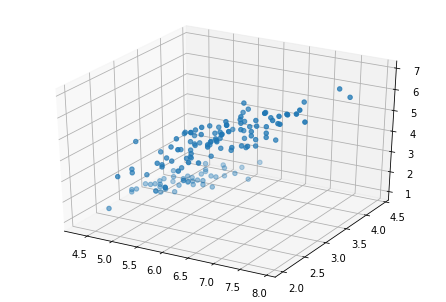

In [ ]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x_a, y_a,z_a)
pyplot.show()

In [ ]:

ax.scatter(x_a, y_a, z_a, c='r', marker='o')

In [ ]:
plt.show()